In [ ]:
#  compare AUROC 
## RNA002 vs RNA004 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import metrics

In [ ]:
## 1. Supp_Figure_11b --- --- 

0.758662369057212
0.7300564061240935


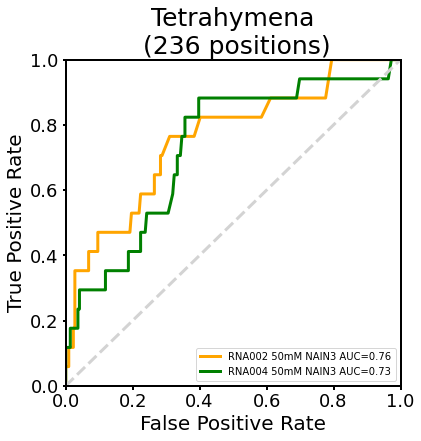

<Figure size 432x288 with 0 Axes>

In [2]:
dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig11/Data/'
safa_allinfo = pd.read_csv('/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig11/Data/safa_tetra.txt', sep='\t')

df_reac1 = pd.read_csv(dir_out+'TETRA-WT_reactivity_RNA002_NAIN3.txt', sep='\t')
df_reac2 = pd.read_csv(dir_out+'TETRA-WT_reactivity_RNA004_NAIN3.txt', sep='\t')


### Tetrahymena AUROC -----
### PLOT1 all genes
df1 = pd.merge(df_reac1,safa_allinfo, how='inner',on=['Position','Position'])
flt1 = df1

df2 = pd.merge(df_reac2,safa_allinfo, how='inner',on=['Position','Position'])
flt2 = df2

# condition_1
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(flt1.strand, flt1.mod_rate, pos_label=1)
roc_auc_1 = metrics.auc(fpr_1, tpr_1)
print(roc_auc_1)

fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(flt2.strand, flt2.mod_rate, pos_label=1)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
print(roc_auc_2)


# plot -----
    
fig, (ax) = plt.subplots(1, 1, figsize = (6, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(width = 2)
    
plt.title('Tetrahymena'+'\n ('+str(flt1.shape[0])+' positions)', fontsize = 25)
plt.plot(fpr_1, tpr_1, color = 'orange', linewidth = 3.0, label = 'RNA002 50mM NAIN3 AUC=%0.2f' % roc_auc_1,)
plt.plot(fpr_2, tpr_2, color = 'green', linewidth = 3.0, label = 'RNA004 50mM NAIN3 AUC=%0.2f' % roc_auc_2,)

plt.legend(loc = 'lower right', fontsize = 10)
plt.plot([0, 1], [0, 1], color = 'lightgrey', linewidth = 3.0, linestyle = 'dashed')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig11/Data/'
plt.savefig(dir_out+'Supp_Figure_11b_AUROC_RNA002_RNA004.pdf', bbox_inches='tight', dpi=300) 